In [21]:
# Import tesla data for the last two year Date(From: 04/07/2020 To: 04/07/2018)
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import pandas_datareader.data as web


style.use('ggplot')

# Read csv file. The making the date to be the index
df = pd.read_csv("DATA/TSLA.csv", parse_dates=True, index_col=0)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-04-09,300.369995,309.500000,289.209991,289.660004,289.660004,10249800
2018-04-10,298.970001,307.100006,293.679993,304.700012,304.700012,10989800
2018-04-11,300.739990,308.980011,299.660004,300.929993,300.929993,7482900
2018-04-12,302.320007,303.950012,293.679993,294.079987,294.079987,7608800
2018-04-13,303.600006,303.950012,295.980011,300.339996,300.339996,7327200


In [2]:
change = (df["Open"] - df["Close"])/df["Open"]
df["Change"] = change
df.head()

,Open,High,Low,Close,Adj Close,Volume,Change
Date,,,,,,,
2018-04-09,300.369995,309.500000,289.209991,289.660004,289.660004,10249800,0.035656
2018-04-10,298.970001,307.100006,293.679993,304.700012,304.700012,10989800,-0.019166
2018-04-11,300.739990,308.980011,299.660004,300.929993,300.929993,7482900,-0.000632
2018-04-12,302.320007,303.950012,293.679993,294.079987,294.079987,7608800,0.027256
2018-04-13,303.600006,303.950012,295.980011,300.339996,300.339996,7327200,0.010738


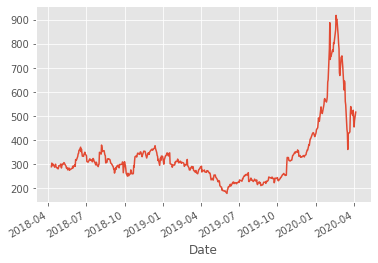

In [22]:
# Adjusted Price
df['Adj Close'].plot()

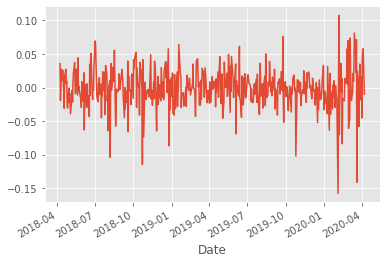

In [4]:
# Volatility of the price in Tesla
df['Change'].plot()

In [5]:
# Rolling 100 day max
df['100ma'] = df['Adj Close'].rolling(window=100, min_periods=0).mean()
df.head()

,Open,High,Low,Close,Adj Close,Volume,Change,100ma
Date,,,,,,,,
2018-04-09,300.369995,309.500000,289.209991,289.660004,289.660004,10249800,0.035656,289.660004
2018-04-10,298.970001,307.100006,293.679993,304.700012,304.700012,10989800,-0.019166,297.180008
2018-04-11,300.739990,308.980011,299.660004,300.929993,300.929993,7482900,-0.000632,298.430003
2018-04-12,302.320007,303.950012,293.679993,294.079987,294.079987,7608800,0.027256,297.342499
2018-04-13,303.600006,303.950012,295.980011,300.339996,300.339996,7327200,0.010738,297.941998


In [6]:
# If you want to drop nan values

#drop = df.dropna(inplace=True)
#drop.head()

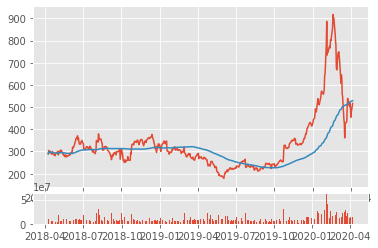

In [7]:
# Other way to graph 

ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=5, colspan=1)

ax1.plot(df.index, df['Adj Close'])
ax1.plot(df.index, df['100ma'])
ax2.bar(df.index,df['Volume'])
plt.show()


In [8]:
# resample the data
# ohlc open high low close
# New mplfinace doc (https://github.com/matplotlib/mplfinance)
import mplfinance as mpf
import matplotlib.dates as mdates

In [19]:
# ohlc open high low close
df_ohlc = df['Adj Close'].resample('10D').ohlc()
df_volume = df['Volume'].resample('10D').mean()

# reset the date index 
# df_ohlc.reset_index(inplace=True)

# change the dates to a new format
# df_ohlc['Date'] = df_ohlc['Date'].map(mdates.date2num)
df_ohlc

,open,high,low,close
Date,,,,
2018-04-09,289.660004,304.700012,287.690002,293.350006
2018-04-19,300.079987,300.079987,280.690002,294.079987
2018-04-29,293.899994,302.769989,284.450012,301.970001
2018-05-09,306.850006,306.850006,276.820007,276.820007
2018-05-19,284.489990,284.489990,275.010010,278.850006
...,...,...,...,...
2020-02-18,858.400024,917.419983,679.000000,679.000000
2020-02-28,667.989990,749.500000,667.989990,703.479980
2020-03-09,608.000000,645.330017,361.220001,361.220001


In [20]:
mpf.plot(df_ohlc)

KeyError: 'Open'